In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [2]:
#data_set
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = (x_train.astype('float32') / 255.0).reshape(-1, 28, 28, 1)
x_test = (x_test.astype('float32') / 255.0).reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def add_noise(x, noise_factor=0.5):
    noise = noise_factor * np.random.normal(loc=0, scale=1, size=x.shape)
    x_noisy = x + noise
    return np.clip(x_noisy, 0.0, 1.0)

In [4]:
#add_noise
noisy_x_train = add_noise(x_train)
noisy_x_test = add_noise(x_test)


In [5]:
#u_net_like
input_img = keras.Input(shape=(28, 28, 1))


In [6]:
#Block_1:28*28->14*14
c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
c1 = layers.BatchNormalization()(c1)
c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
c1 = layers.BatchNormalization()(c1)
p1=layers.MaxPooling2D()(c1)

In [7]:
#Block_2:14*14->7*7
c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
c2 = layers.BatchNormalization()(c2)
c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
c2 = layers.BatchNormalization()(c2)
p2 = layers.MaxPooling2D((2, 2))(c2)

In [8]:
b = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
b = layers.BatchNormalization()(b)
b = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(b)
b = layers.BatchNormalization()(b)

In [9]:
#Block_1:7*7->14*14
u1 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(b)

In [10]:
c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u1)
c3 = layers.BatchNormalization()(c3)
c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c3)
c3 = layers.BatchNormalization()(c3)


In [11]:
#Block_2:14*14->28*28
u2 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c3)

In [12]:
u2 = layers.concatenate([u2, c1])
c4 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u2)
c4 = layers.BatchNormalization()(c4)
c4 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c4)
c4 = layers.BatchNormalization()(c4)

In [13]:
output_img = layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(c4)


In [14]:
autoencoder = models.Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
#SHOW MODEL
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 28, 28,    │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 28, 28,    │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 28, 28,    │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 14, 14,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 14, 14,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 7, 7, 64)  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 7, 7, 128) │     73,856 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 128) │        512 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 7, 7, 128) │    147,584 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 128) │        512 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 14, 14,    │     32,832 │ batch_normalizat… │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 14, 14,    │     36,928 │ conv2d_transpose… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 431,649 (1.65 MB)

 Trainable params: 430,369 (1.64 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [16]:
EPOCHS = 10
BATCH_SIZE = 128
NUM_IMAGES_TO_DISPLAY = 10

In [17]:
history = autoencoder.fit(
    noisy_x_train,
    x_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_data=(noisy_x_test, x_test)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 40ms/step - loss: 0.0327 - val_loss: 0.0137
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.0099 - val_loss: 0.0093
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - loss: 0.0091 - val_loss: 0.0089
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.0087 - val_loss: 0.0087
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - loss: 0.0084 - val_loss: 0.0087
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - loss: 0.0082 - val_loss: 0.0085
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - loss: 0.0080 - val_loss: 0.0084
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - loss: 0.0079 - val_loss: 0.0084
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - loss: 0.0077 - val_loss: 0.0084
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - loss: 0.0076 - val_loss: 0.0084


In [18]:
test_loss = autoencoder.evaluate(noisy_x_test, x_test, verbose=0)


In [19]:
denoised_images = autoencoder.predict(noisy_x_test)

plt.figure(figsize=(20, 6))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

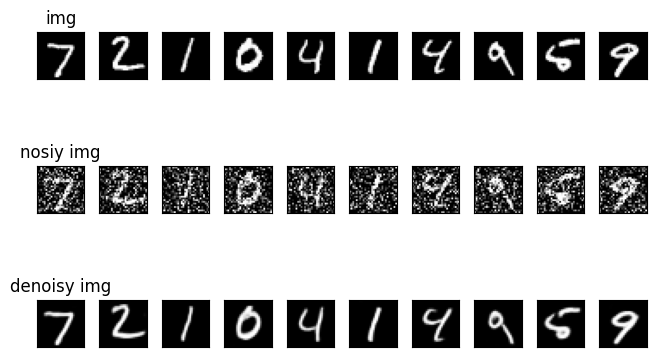

In [20]:
for i in range(NUM_IMAGES_TO_DISPLAY):
    # img
    ax = plt.subplot(3, NUM_IMAGES_TO_DISPLAY, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False); ax.get_yaxis().set_visible(False)
    if i == 0: ax.set_title('img')

    #nosiy_img
    ax = plt.subplot(3, NUM_IMAGES_TO_DISPLAY, i + 1 + NUM_IMAGES_TO_DISPLAY)
    plt.imshow(noisy_x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False); ax.get_yaxis().set_visible(False)
    if i == 0: ax.set_title('nosiy img')

    #denoisy_img
    ax = plt.subplot(3, NUM_IMAGES_TO_DISPLAY, i + 1 + 2 * NUM_IMAGES_TO_DISPLAY)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False); ax.get_yaxis().set_visible(False)
    if i == 0: ax.set_title('denoisy img')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
